<a href="https://colab.research.google.com/github/qzh0004/NSF-IUSE/blob/main/notebooks/ISLP_Bias_Variance_Trade_off_IUSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Bias-Variance Trade-Off

The U-shape observed in test MSE is the result of two competing properties of ML methods.

The expected test MSE, for a given value $x_0$, can always be decomposed into the sum of three fundamental quantities: the variance of $\hat{f}(x_0)$, the squared bias of $\hat{f}(x_0)$ and the variance of the error terms $\epsilon$.

$\mathbb{E}(y_0-\hat{f}(x_0))^2=Var(\hat{f}(x_0)+[Bias(\hat{f}(x_0))]^2+Var(\epsilon)$

where

$Bias(\hat{f}(x_0))=f(x_0)-\mathbb{E}(\hat{f}(x_0))$

The purpose of this notebook is to illustrate the bias-variance trade-off using a numerical example.


In [ ]:
%%capture
import warnings
warnings.filterwarnings("ignore")
!gdown --id 1--V3zPqeGs5iLhUac5Lx0Gsf1-e6XBka
import Bias_Variance_Hints

Training data generation
------------------------

First we will write a function to generate a random sample. The data generation model is the following:

$y = 2sin(1.5x) + \epsilon$

with $\epsilon\sim\mathcal{N}(0,0.5)$

First we define the underlying functions: $f=2sin(1.5x)$, which is not known for real world problems, and the observed response $y=f+\epsilon$.

In [ ]:
import numpy as np
global sigma # standard deviation of the error term (variance=sigma**2)
sigma=0.5
np.random.seed(seed=0) # define random seed so the results are repeatable.
def f(x):
    '''
    Returns a sample with instances/observations without noise (true but unknown value).
    '''
    yt = 2 * np.sin(x * 1.5)
    return yt

def y_m(x):
    '''
    Retrun a sample with instances/observations with noise/error (measured value).
    '''
    global sigma
    y = 2 * np.sin(x * 1.5) + np.random.normal(0, sigma, x.size)
    return y



## <font color='red'>Question: What is the difference between the output of $f$ and $y$ in this simulated case?
(please type your answer by double click on "Answer" below)</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h1()

Button(description='Show Hint', style=ButtonStyle())

Output()

 ## <font color='red'>Question: In practice, is $f$ usually known? Besides measurement noise (i.e., unmeasurable variation), what are the other factors that could contribute to $\epsilon$ (hint: read textbook)? (please type your answer below by double click on "Answer" below)</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h2()


Button(description='Show Hint', style=ButtonStyle())

Output()

Next we plot $f$ (underlying unknown function) as a line/curve, and a sample of $y$ (sample size 50, *i.e.*, 50 instances/observations) as dots.

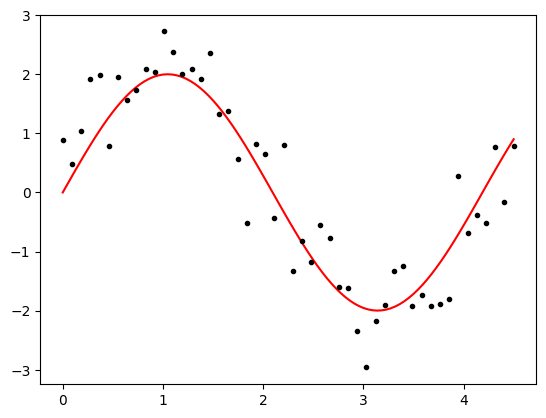

In [ ]:
import matplotlib.pyplot as plt
n_obs = 50 # number of observations in each sample.
xm = np.linspace(0, 4.5, n_obs)
xt=np.linspace(0, 4.5, 100)
yt = f(xt)
plt.plot(xt, yt,'r')
ym = y_m(xm)
plt.plot(xm, ym, 'k.')
plt.show()

## <font color='red'>Question: Right now, how many observations do we have? What would happen if you increased it to 500 or 5000? How do you think that might change the plot (both the red line and the black points)?
(hint: remember to record the original parameters in the code and change them back to the original parameters (e.g., by using comment #). (please type your answer below by double click on "Answer" below)</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h3()


Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: What if you only had 5 observations? Is it still easy to discern the underlying function from just a few points?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h4()


Button(description='Show Hint', style=ButtonStyle())

Output()

 ## <font color='red'>Question: In practice, the noise or error magnitude can vary from application to application. It even depends on the units of the output. For example, $mm$ vs. $m$ used in length measurement. How is this magnitude controlled in this simulated example? Can you simulate a scenario where the noise/error is very small?</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h5()


Button(description='Show Hint', style=ButtonStyle())

Output()

Model fitting
=============

We will use least square regression (LSR) to fit a polynomial to the data. Actually, we will use multivariate linear regression, over a dataset built in the following way:

For each sample $x_{i}$ we build a vector $(1 , x_{i} , x_{i}^{2} , \dots , x_{i}^{n})$  and we use LSR to fit a function $g:\mathbb{R}^{n+1}\rightarrow\mathbb{R}$ to the training data. If you don't understand the following section, don't worry. It will not affect your progress of the sections followed.

One example is shown below where we fit the sample that we obtained earlier using an 8-th order polynomial. Still, the sample instances/points are shown as dots, the true model as red line/curve and the fitted/estimated model as blue line/curve.

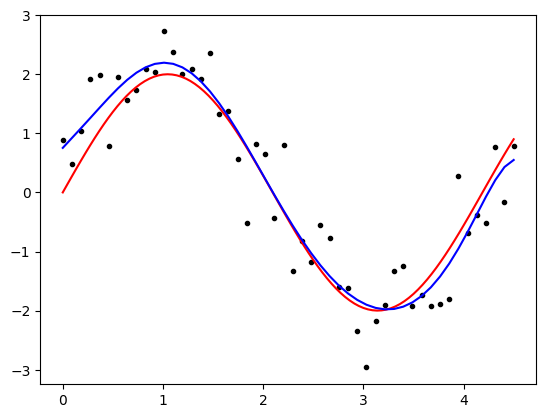

In [ ]:
import matplotlib.pyplot as plt
from os import XATTR_SIZE_MAX
from sklearn.linear_model import LinearRegression  # liner regression model
from sklearn.preprocessing import PolynomialFeatures # polynommial features(extended features)

d=8; #degree of polynomial
poly_features = PolynomialFeatures(degree=d) # decide the maximal degree of the polynomial feature
xx=xm.reshape(-1, 1)
x_poly = poly_features.fit_transform(xx) # convert the original feature to polynomial feature
lin_reg = LinearRegression()
lin_reg.fit(x_poly,ym)
yp = lin_reg.predict(x_poly)
plt.plot(xm, ym, 'k.')
plt.plot(xt, yt,'r')
plt.plot(xm, yp,'b')


 ## <font color='red'>Question: Why might a polynomial be used to approximate a sine function (which is not actually a polynomial)?</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h6()

Button(description='Show Hint', style=ButtonStyle())

Output()

 ## <font color='red'>Question: If you already know the underlying function is sinusoidal, would you still prefer a polynomial model? Why or why not?</font>

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h7()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: What happens if you increase or decrease the polynomial degree $d$? How will it affect the fit on the training data vs. the true function? (Hint: Test out different $d$ in the above codes then answer those questions based on your observations.)

## <font color='red'>Answer:

## <font color='red'>Question:Is a higher-degree polynomial always better? What drawbacks might it have?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h8()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question:What would happen if you repeated the experiment (with new random noise) for the same polynomial degree? Would you get exactly the same polynomial fit?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h9()

Button(description='Show Hint', style=ButtonStyle())

Output()

Model Bias and Variance
---------------

The following code generates a set of `n_sam` samples, allowing us to estimate $\hat{f}$ `n_sam` times. Those models are plotted as black lines.


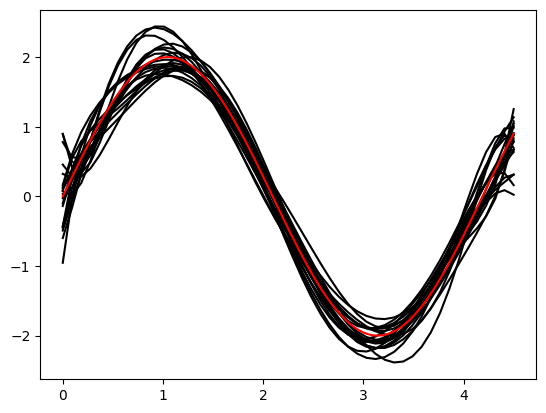

In [ ]:
x0 = np.array([4.6]) # the test sample of x=4.6
xx_new=np.append(xx,x0)
xx_new=xx_new.reshape(-1, 1)
x0_poly = poly_features.fit_transform(xx_new) # convert the original feature to polynomial feature
degree = 3 # model polynomial order. you can change it to see how it affects the model
n_obs = 50 # number of observations in each sample.
n_sam= 20 # number of samples
yt0=np.zeros(n_sam) # true y, which is not known in the real world
ym0=np.zeros(n_sam) # measured y with error
yp0=np.zeros(n_sam) # predicted y
for i in range(n_sam):
    y = y_m(xm)
    model = LinearRegression()
    model.fit(x_poly,y)
    yp = model.predict(x_poly) # make predictions using trained Linear Regression model
    tmp=model.predict(x0_poly)
    yp0[i]=tmp[-1]
    ym0[i]=y_m(x0)
    yt0[i]=f(x0)
    plt.plot(xm, yp, 'k-')
plt.plot(xt, yt,'r')
plt.show()

## <font color='red'>Question:What do these 20 different samples illustrate?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h10()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: If you only had one sample, how might you mistakenly judge your model’s performance? What does seeing multiple samples reveal that one sample doesn’t?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h10b()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: For each sample, we get a different predicted value at $x=4.6$ (the unseen test sample), illustrated as the last points of all curves. (Note that this is also true for the training samples.) Why does $\hat{f}(4.6)$ (or $\hat{f}(x)$ in general) differ from one sample to another even though the underlying function is the same?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h11()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: How does the spread (variance) of the 20 predictions at $x=4.6$ inform us about the reliability or stability of the model?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h12()

Button(description='Show Hint', style=ButtonStyle())

Output()

# Calculation and visualization of bias and variance
Now we have predictions from 10 models trained by 10 samples. We can calucate the bias and variance and visualize them on graphs.

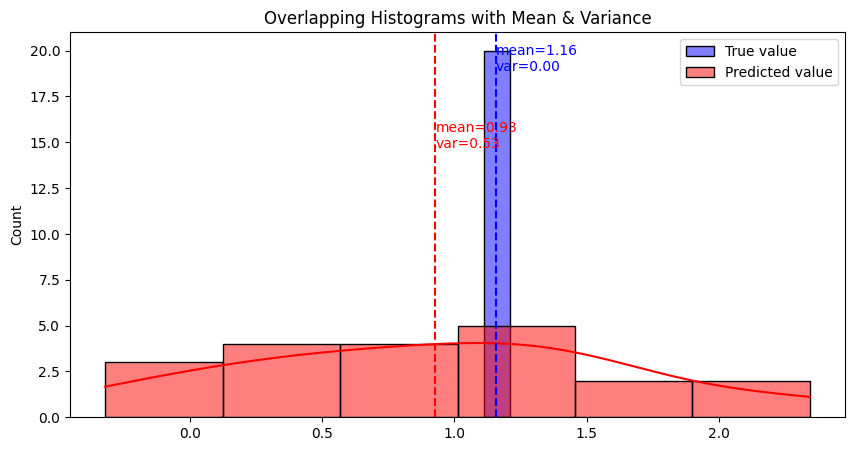

In [ ]:
import seaborn as sns
# Calculate stats
mean1, var1 = np.mean(yt0), np.var(yt0)
mean2, var2 = np.mean(yp0), np.var(yp0)
bin = [1.16-0.05, 1.16+0.05]  # Just 0.01 wide
# Plot overlapping histograms with KDE
plt.figure(figsize=(10, 5))
sns.histplot(yt0, bins=bin, kde=False, color='blue', label='True value', alpha=0.5)
sns.histplot(yp0, color='red', label='Predicted value', alpha=0.5, kde=True)

# Add vertical lines for the means
plt.axvline(mean1, color='blue', linestyle='--')
plt.axvline(mean2, color='red', linestyle='--')

# Annotate mean and variance near each vertical line
# (You can adjust the x and y positions to suit your data)
ymax = plt.ylim()[1]  # Get top limit of y-axis for positioning text
plt.text(mean1, 0.9*ymax, f"mean={mean1:.2f}\nvar={var1:.2f}", color='blue')
plt.text(mean2, 0.7*ymax, f"mean={mean2:.2f}\nvar={var2:.2f}", color='red')

plt.title("Overlapping Histograms with Mean & Variance")
plt.legend()
plt.show()

## <font color='red'>Question: Why are we plotting both the true values (yt0) and predicted values (yp0) on the same histogram?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h13()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: What does the difference in location between the two histogram peaks (or the difference in mean) represent?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h14()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: Is yt0 a single constant repeated 20 times? If so, what does that tell you about the variance in the true value? Is that expected?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h15()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: In the real world, would the true function $f(x)$ ever vary over multiple observations at the exact same $x$? Why or why not?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h16()

Button(description='Show Hint', style=ButtonStyle())

Output()

## Bias
$Bias=|f(x_0)-\mathbb{E}[\hat{f}(x_0)]|$, where $f(x_0)$ is the true value and $\mathbb{E}[\hat{f}(x_0)]$ can be estimated as the mean or average of $\hat{f}(x_0)$.

In [ ]:
# Calculate bias (absolute difference of means)
Bias=abs(mean1-mean2)
print("Bias =", Bias)

Bias = 0.22911463483328098


## <font color='red'>Question: The bias is the average difference between predictions and their own mean, or the average difference between predictions and the true value?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h17()

Button(description='Show Hint', style=ButtonStyle())

Output()

## Variance


In [ ]:
# Calculate variance of the predictions around their own mean
Var=np.var(yp0-mean2) # Variance
print("Variance =", Var)

Variance = 0.5305170433990771


## <font color='red'>Question: Why do we measure the variance around the mean prediction rather than around the true value? How does this variance represent our model’s sensitivity to different training samples?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h18()

Button(description='Show Hint', style=ButtonStyle())

Output()

Note that without subtracting mean from $\hat{f}(x_0)$ won't affect the variance calculation.

In [ ]:
Var=np.var(yp0) # Variance
print("Variance =", Var)

Variance = 0.5305170433990771


## Total error and mean squared error (MSE)
$\mathbb{E}[(y_0)-\hat{f}(x_0))^2]=Var(\hat{f}(x_0))+(Bias(\hat{f}(x_0)))^2+\mathbb{E}[\epsilon^2]$

Note that $\mathbb{E}[\epsilon^2]=Var(\epsilon)=\sigma^2$

In [ ]:
# Total error (theoretical formula for error decomposition: error = bias^2 + variance + noise_variance)
TotErr=Var+Bias**2+sigma**2
print("Total Error =", TotErr)
# MSE at x=4.6: mean of (prediction - true_value)^2 over all samples
MSE = np.mean((yp0 - yt0)**2)
print("MSE =", MSE)

Total Error = 0.8330105592938648
MSE = 0.5830105592938647



## <font color='red'>Question: Looking at $Var+Bias^2+\sigma^2$, how do each of these terms contribute to total error?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h19()

Button(description='Show Hint', style=ButtonStyle())

Output()


Also note that $Var(\epsilon)$ is unknown in reality. But it can be estimated using measured response, i.e., $y$. If we assume $y$ follows (multivariate) Gaussion or Normal distribution, $Var(\epsilon)=Var(y)$.

In [ ]:
VarEst=np.var(ym0)
print(VarEst)

0.31254709674316716


Note that because of the small sample size, which is 20 in this case, the estimated variance will not be an accurate estimate of the true value. Again, the true value is only known in simulated cases but unknown in any real applications.

## The Bias-Variance Trad-Off

Above we only calculated bias, variance and MSE for a fixed model flexibility (i.e., the polynomial order). Now we calculate them for a range of model flexibilities (i.e., a range of polynomial orders).

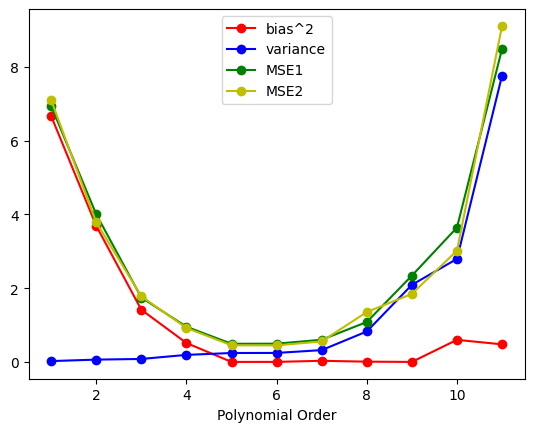

In [ ]:
import warnings
warnings.filterwarnings("ignore")

n_sam2 = 20   # number of samples
n_ord = 11    # maximum polynomial degree to examine

# Arrays now of length n_ord
bia_all  = np.zeros(n_ord)  # bias^2
var_all  = np.zeros(n_ord)  # variance
MSE_all1 = np.zeros(n_ord)  # MSE = bias^2 + variance + noise^2
MSE_all2 = np.zeros(n_ord)  # MSE from (ym0 - yp0)**2

for d in range(1, n_ord + 1):
    # Define polynomial features
    poly_features = PolynomialFeatures(degree=d)
    x_poly = poly_features.fit_transform(xx)
    x0_poly = poly_features.fit_transform(xx_new)

    # Arrays to store per-sample values
    yt0 = np.zeros(n_sam2)  # true y
    ym0 = np.zeros(n_sam2)  # measured y with noise
    yp0 = np.zeros(n_sam2)  # predicted y

    for i in range(n_sam2):
        ym = y_m(xm)
        model = LinearRegression()
        model.fit(x_poly, ym)

        # Predictions for training inputs and x0
        yp = model.predict(x_poly)
        tmp = model.predict(x0_poly)
        yp0[i] = tmp[-1]

        ym0[i] = y_m(x0)
        yt0[i] = f(x0)

    mean_true = np.mean(yt0)
    mean_pred = np.mean(yp0)

    # Compute bias^2
    bias_sq = (mean_true - mean_pred)**2
    bia_all[d-1] = bias_sq

    # Compute variance of predictions
    var_all[d-1] = np.var(yp0)

    # Theoretical MSE
    MSE_all1[d-1] = var_all[d-1] + bias_sq + sigma**2

    # Empirical MSE
    MSE_all2[d-1] = np.mean((ym0 - yp0)**2)

# Polynomial orders for the x-axis
degrees = range(1, n_ord + 1)

# Plot
plt.plot(degrees, bia_all, 'ro-', label='bias^2')
plt.plot(degrees, var_all, 'bo-', label='variance')
plt.plot(degrees, MSE_all1, 'go-', label='MSE1')
plt.plot(degrees, MSE_all2, 'yo-', label='MSE2')

plt.xlabel('Polynomial Order')
plt.legend()
plt.show()

## <font color='red'>Question: Look at the $bias^2$ (bia^2) and $Var$ (variance) curves as we increase the polynomial order from 1 to 11. What pattern do you notice?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h20()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: Compare the two MSE curves: MSE1 (based on the bias-variance decomposition) and MSE2 (based on the squared error of predicted vs. measured values: $(ym0 - yp0)^2$. Why might they be similar or different? In real applications, can we get both MSE1 and MSE2? If only one of them, which one and why?

## <font color='red'>Anwer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h21()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: Where do you see the lowest overall SSE in the plot? Is it at a middle-range polynomial degree, a low degree, or a high degree? How does this relate to the bias-variance trade-off?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h22()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: Explain in your own words why bias decreases with polynomial degree but variance increases. How does that reflect the model’s capacity to fit complex curves?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h23()

Button(description='Show Hint', style=ButtonStyle())

Output()

## <font color='red'>Question: In practical settings, how do data scientists pick model complexity (e.g., polynomial degree, neural network size) when they can't measure true bias or variance directly?

## <font color='red'>Answer:

In [ ]:
# @title
Bias_Variance_Hints.display_hint_h24()

Button(description='Show Hint', style=ButtonStyle())

Output()

## References
This notebook is adapted and improved based on: https://gist.github.com/fabgoos/6788818